# Lab 4: Data Conversion Figures of Merit

## Question 1

A 200mV rms value sinusoidal signal is applied to and ideal 12 bits ADC. The full range peak-to-peak voltage of the ADC is 1.2V.

### 1a

Part a: Find the SNR of the ADC output using Python and provide plots.


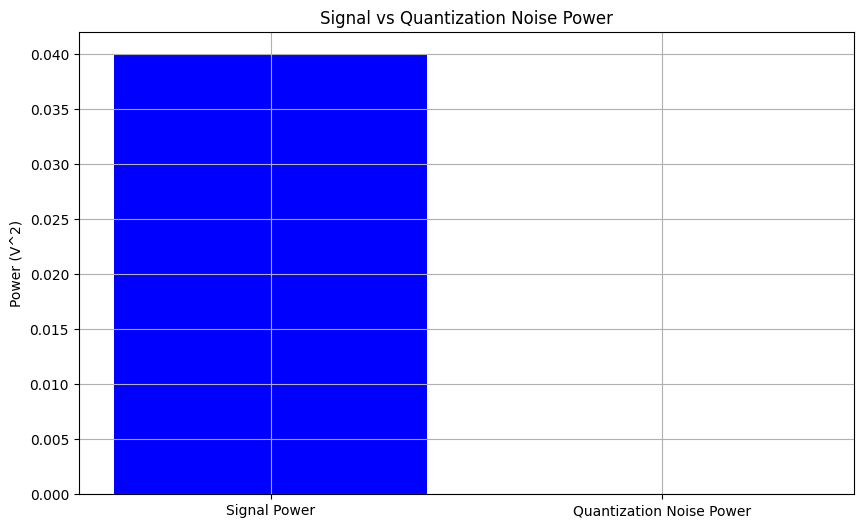

SNR of ADC Output: 67.48 dB


In [115]:
#imports
import numpy as np
import matplotlib.pyplot as plt

rms_input = 0.2  # RMS value of the sinusoidal input (V)
full_scale_range = 1.2  # Full-scale peak-to-peak voltage of the ADC (V)
resolution_bits = 12  # ADC resolution in bits

quantization_step = full_scale_range / (2**resolution_bits)
quantization_noise_power = (quantization_step**2) / 12

signal_power = rms_input**2

snr_adc_output = 10 * np.log10(signal_power / quantization_noise_power)

plt.figure(figsize=(10, 6))
plt.bar(['Signal Power', 'Quantization Noise Power'], [signal_power, quantization_noise_power], color=['blue', 'orange'])
plt.title('Signal vs Quantization Noise Power')
plt.ylabel('Power (V^2)')
plt.grid(True)
plt.show()

print(f"SNR of ADC Output: {snr_adc_output:.2f} dB")


### 1b

Part b: Now the input sinusoidal is full range but comes with an additive Gaussian noise with standard deviation of 0.5 V. What is the SNR of the input signal? What is the SNR of the ADC output bits?


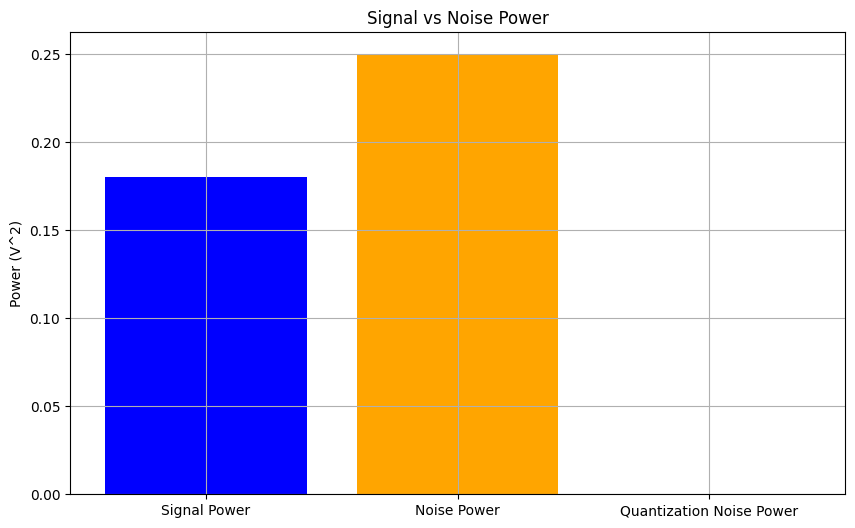

SNR of Input Signal: -1.43 dB
SNR of ADC Output Bits: -1.43 dB


In [116]:
noise_std_dev = 0.5  
signal_power = (full_scale_range / (2 * np.sqrt(2)))**2  

noise_power = noise_std_dev**2

snr_input_signal = 10 * np.log10(signal_power / noise_power)

total_noise_power_adc = noise_power + quantization_noise_power

snr_adc_output_bits = 10 * np.log10(signal_power / total_noise_power_adc)

plt.figure(figsize=(10, 6))
plt.bar(['Signal Power', 'Noise Power', 'Quantization Noise Power'], [signal_power, noise_power, quantization_noise_power], color=['blue', 'orange', 'green'])
plt.title('Signal vs Noise Power')
plt.ylabel('Power (V^2)')
plt.grid(True)
plt.show()

print(f"SNR of Input Signal: {snr_input_signal:.2f} dB")
print(f"SNR of ADC Output Bits: {snr_adc_output_bits:.2f} dB")


### 1c

Part c: Repeat b assuming that the noise added to the sinewave is uniformly distributed with peak-to-peak value of 1V.


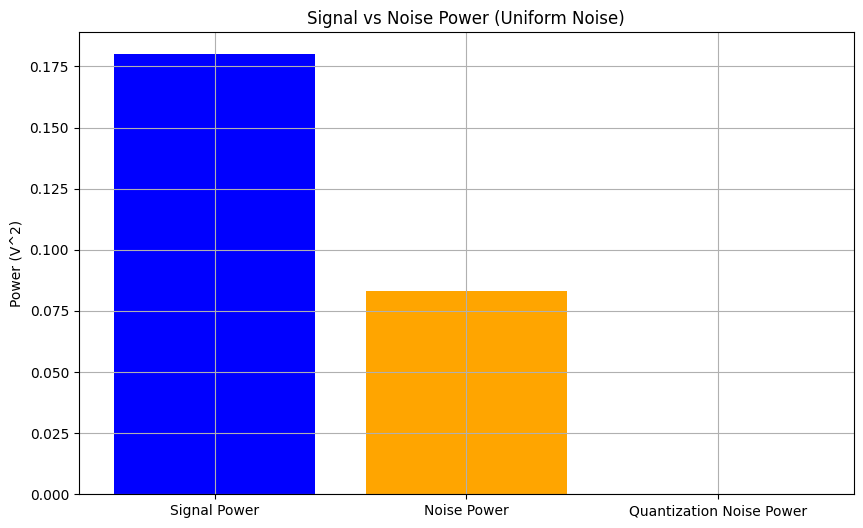

SNR of Input Signal (Uniform Noise): 3.34 dB
SNR of ADC Output Bits (Uniform Noise): 3.34 dB


In [117]:
noise_peak_to_peak = 1.0  

noise_power_uniform = (noise_peak_to_peak**2) / 12

snr_input_signal_uniform = 10 * np.log10(signal_power / noise_power_uniform)

total_noise_power_adc_uniform = noise_power_uniform + quantization_noise_power

snr_adc_output_bits_uniform = 10 * np.log10(signal_power / total_noise_power_adc_uniform)

plt.figure(figsize=(10, 6))
plt.bar(['Signal Power', 'Noise Power', 'Quantization Noise Power'], [signal_power, noise_power_uniform, quantization_noise_power], color=['blue', 'orange', 'green'])
plt.title('Signal vs Noise Power (Uniform Noise)')
plt.ylabel('Power (V^2)')
plt.grid(True)
plt.show()

print(f"SNR of Input Signal (Uniform Noise): {snr_input_signal_uniform:.2f} dB")
print(f"SNR of ADC Output Bits (Uniform Noise): {snr_adc_output_bits_uniform:.2f} dB")


------------------------------------

## Question 2

Assume that an ADC uses an oversampling factor \(K = \frac{f_s}{2B}\), where \(f_s\) is the sampling rate and \(B\) is the signal bandwidth. Then \(K = 1\) is Nyquist rate and \(K > 1\) means oversampling. The quantization noise variance is \(\sigma_e^2 = \frac{\Delta^2}{12}\) as we defined in class for the additive noise model. As you may recall also, this noise is uniformly distributed and white, i.e., is flat in the frequency range \([0, f_s/2]\). Then the noise power spectral density will be \(\frac{\sigma_e^2}{f_s}\), so the integral in the range \([-f_s/2, f_s/2]\) is \(\sigma_e^2\). Now assume that a perfect low-pass filter is used that selects the signal bandwidth \(B\) and rejects all the out of band noise. Find an expression for the output SNR of this oversampled ADC+low-pass filter combination.

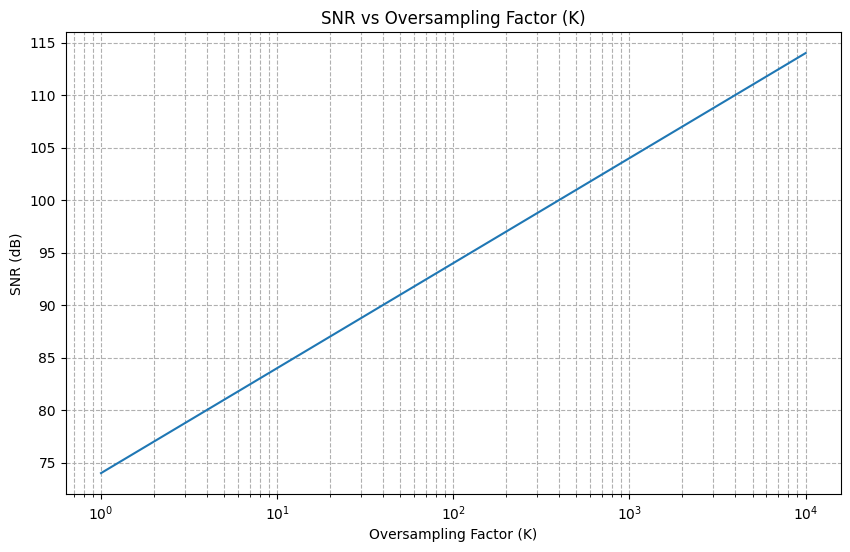

In [137]:
def calculate_snr(N, K):
    """
    Calculates SNR for an oversampled ADC with low-pass filtering
    N: Number of bits
    K: Oversampling factor
    """
    return 6.02*N + 1.76 + 10*np.log10(K)

# Parameters
N = 12  # ADC resolution (bits)
K_values = np.logspace(0, 4, 100)  # Oversampling factors from 1 to 10000

snr_values = calculate_snr(N, K_values)

# Plot
plt.figure(figsize=(10, 6))
plt.semilogx(K_values, snr_values)
plt.title("SNR vs Oversampling Factor (K)")
plt.xlabel("Oversampling Factor (K)")
plt.ylabel("SNR (dB)")
plt.grid(True, which="both", ls="--")
plt.show()


**Derivation**

1. **Oversampling Factor**:
   K = f_s / (2B)
   
2. **Quantization Noise Power**:
   σ_e² = Δ² / 12

3. **Noise Power Spectral Density (PSD)**:
   PSD = σ_e² / f_s

4. **Filtered Noise Power** (after ideal LPF):
   P_noise_filtered = PSD * 2B = (σ_e² / f_s) * 2B = σ_e² / K

5. **Signal Power** (full-scale sinusoid):
   P_signal = (V_FS/(2√2))²

6. **Output SNR**:
   SNR = 10*log10(P_signal / P_noise_filtered)
       = 6.02N + 1.76 + 10*log10(K)

-------------

## Question 3

A 3-bit D/A converter was designed for an ideal LSB level of 100 mV. The following
output voltages levels were measured for the real D/A for thee codes 000 to 111
respectively: -0.01V 0.105V 0.195V 0.28V 0.37V 0.48V 0.6V 0.75V

In [119]:
# Hint: I suggest you take a look at the following article in case of you have questions for this problem: 
# http://focus.ti.com/lit/an/slaa013/slaa013.pdf#search=%22understanding%20data%20converters%20%22

### 3a

Part a: Find the offset \& full-scale error in units of LSBs

In [120]:
#given
measured_outputs = np.array([-0.01, 0.105, 0.195, 0.28, 0.37, 0.48, 0.6, 0.75])  # in volts
ideal_lsb = 0.1  # in volts
num_bits = 3
ideal_full_scale = (2**num_bits - 1) * ideal_lsb  

offset_error = measured_outputs[0] / ideal_lsb  # in LSBs

full_scale_error = (measured_outputs[-1] - ideal_full_scale) / ideal_lsb  # in LSBs

print(f"Offset Error: {offset_error:.2f} LSB")
print(f"Full-Scale Error: {full_scale_error:.2f} LSB")

Offset Error: -0.10 LSB
Full-Scale Error: 0.50 LSB


### 3b

Part b: Find the end-point ideal \& actual gain in LSB/code and compute the gain error in LSB/code


In [121]:
# In a DAC, gain can be expressed as "LSB per code," which measures how many LSBs correspond to one digital code step.

ideal_gain = ideal_full_scale / (2**num_bits - 1)  

actual_gain = (measured_outputs[-1] - measured_outputs[0]) / (2**num_bits - 1)

gain_error = (actual_gain - ideal_gain) / ideal_lsb 

print(f"Ideal Gain: {ideal_gain:.2f} V/code")
print(f"Actual Gain: {actual_gain:.2f} V/code")
print(f"Gain Error: {gain_error:.2f} LSB/code")

Ideal Gain: 0.10 V/code
Actual Gain: 0.11 V/code
Gain Error: 0.09 LSB/code


### 3c

Part c: Find the end point corrected codes and compute DNL & INL for all the codes.


Code | Measured Output (V) | Corrected Code | DNL (LSB) | INL (LSB)
   0 |               -0.010 |         0.000 |     0.000 |     0.000
   1 |                0.105 |         1.059 |     0.059 |     0.059
   2 |                0.195 |         1.888 |    -0.171 |    -0.112
   3 |                0.280 |         2.671 |    -0.217 |    -0.329
   4 |                0.370 |         3.500 |    -0.171 |    -0.500
   5 |                0.480 |         4.513 |     0.013 |    -0.487
   6 |                0.600 |         5.618 |     0.105 |    -0.382
   7 |                0.750 |         7.000 |     0.382 |     0.000


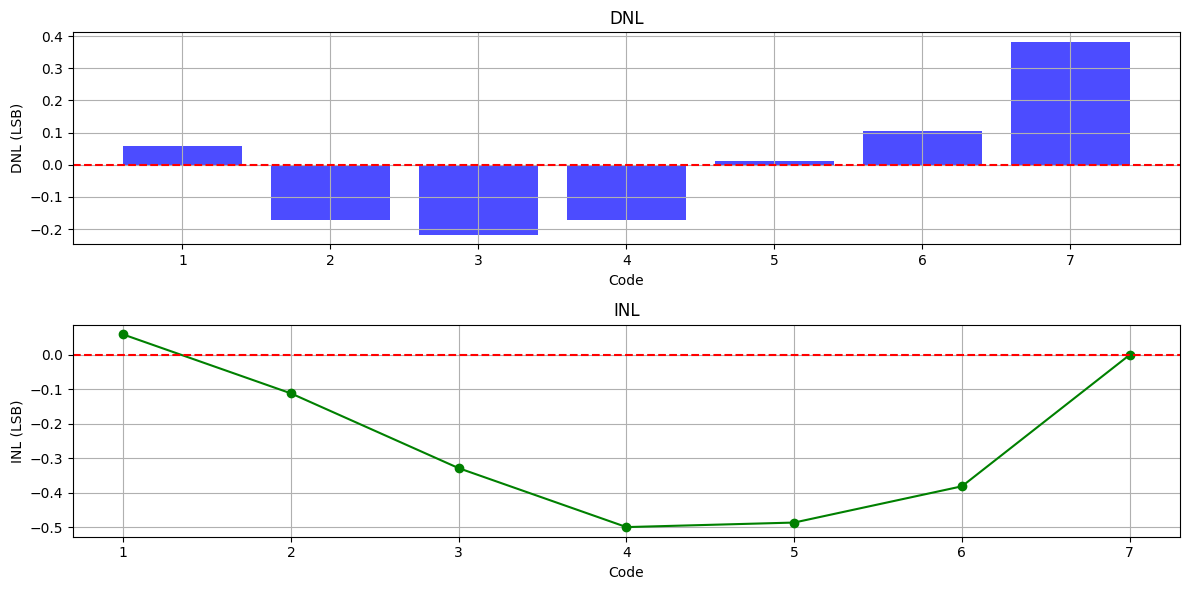

In [122]:
#Given
measured_outputs = np.array([-0.01, 0.105, 0.195, 0.28, 0.37, 0.48, 0.6, 0.75])  # in volts
ideal_lsb = 0.1  # in volts
num_bits = 3
ideal_full_scale = (2**num_bits - 1) * ideal_lsb  

#corrected codes measurement
actual_lsb = (measured_outputs[-1] - measured_outputs[0]) / (2**num_bits - 1)
corrected_codes = (measured_outputs - measured_outputs[0]) / actual_lsb


#dnl and inl
ideal_code_width = 1 
actual_code_widths = np.diff(corrected_codes)
dnl = actual_code_widths - ideal_code_width

inl = np.cumsum(dnl)

print("Code | Measured Output (V) | Corrected Code | DNL (LSB) | INL (LSB)")
for code in range(len(measured_outputs)):
    dnl_value = dnl[code - 1] if code > 0 else 0
    inl_value = inl[code - 1] if code > 0 else 0
    print(f"{code:4} | {measured_outputs[code]:20.3f} | {corrected_codes[code]:13.3f} | {dnl_value:9.3f} | {inl_value:9.3f}")


#plotting the figures for DNL and INL
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.bar(range(1, len(dnl) + 1), dnl, color='blue', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("DNL")
plt.xlabel("Code")
plt.ylabel("DNL (LSB)")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(range(1, len(inl) + 1), inl, marker='o', color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title("INL")
plt.xlabel("Code")
plt.ylabel("INL (LSB)")
plt.grid()

plt.tight_layout()
plt.show()

### 3d

Part d: What is the maximum DNL and INL?

In [123]:
max_dnl = np.max(dnl)
max_inl = np.max(inl)

print(f"Maximum DNL: {max_dnl:.2f} LSB")
print(f"Maximum INL: {max_inl:.2f} LSB")

if max_dnl > 1 or max_inl > 1:
    print("Warning: Maximum DNL or INL exceeds the acceptable range!")
else:
    print("Maximum DNL and INL are within the normal range.")

Maximum DNL: 0.38 LSB
Maximum INL: 0.06 LSB
Maximum DNL and INL are within the normal range.


---------------------------

## Question 4

A ramp histogram is used to characterize a 4-bit ADC, and the following vector is found: 43 115 85 101 122 170 75 146 125 60 95 95 115 40 120 242

### 4a

Part a: Calculate the DNL and INL


Total number of samples: 1749
Number of codes (2^N): 16
Ideal Code Width: 109.31 (total_samples / num_codes)
DNL values (in LSB): [-0.60663236  0.05202973 -0.22241281 -0.07604345  0.11606632  0.55517439
 -0.31389365  0.33562035  0.14351058 -0.45111492 -0.13093196 -0.13093196
  0.05202973 -0.63407662  0.09777015  1.21383648]
INL values (in LSB): [np.float64(-0.6066323613493425), np.float64(-0.5546026300743283), np.float64(-0.777015437392796), np.float64(-0.85305889079474), np.float64(-0.7369925671812466), np.float64(-0.181818181818182), np.float64(-0.49571183533447705), np.float64(-0.16009148084619806), np.float64(-0.016580903373356493), np.float64(-0.4676958261863925), np.float64(-0.5986277873070328), np.float64(-0.7295597484276731), np.float64(-0.6775300171526589), np.float64(-1.3116066323613498), np.float64(-1.2138364779874218), np.float64(-4.440892098500626e-16)]


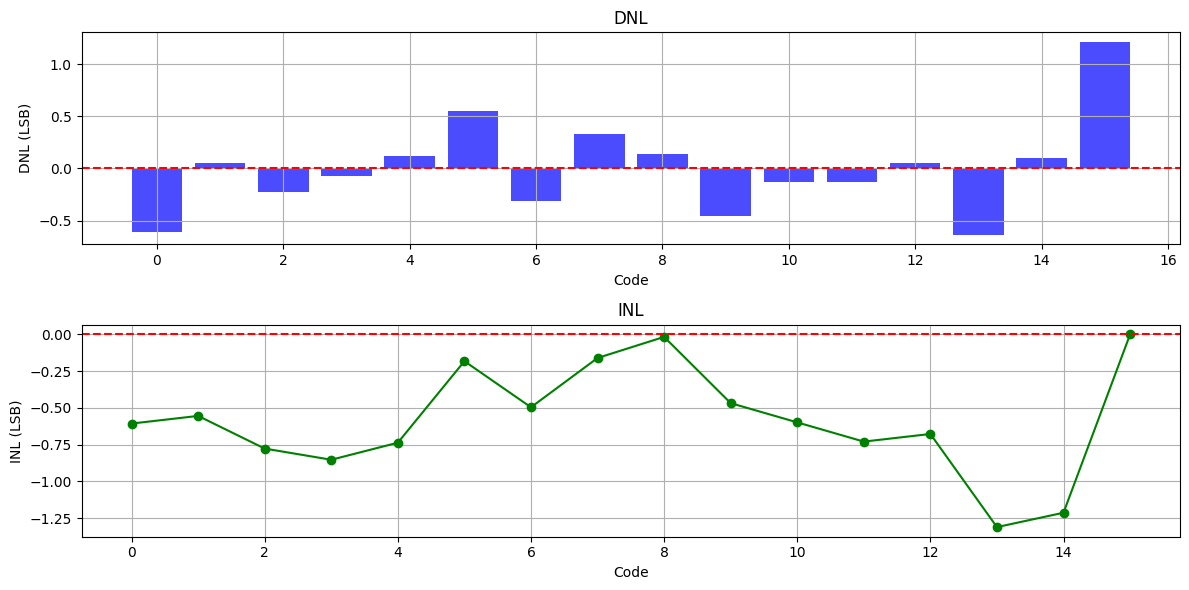

In [124]:
histogram = np.array([43, 115, 85, 101, 122, 170, 75, 146, 125, 60, 95, 95, 115, 40, 120, 242])

total_samples = np.sum(histogram)

N = 4   
num_codes = 2**N

print(f"Total number of samples: {total_samples}")
print(f"Number of codes (2^N): {num_codes}")

ideal_code_width = total_samples / num_codes
print(f"Ideal Code Width: {ideal_code_width:.2f} (total_samples / num_codes)")

dnl = (histogram / ideal_code_width) - 1

inl = []
cumulative_inl = 0

for i in range(num_codes):
    cumulative_inl += dnl[i]
    inl.append(cumulative_inl)

dnl = np.array(dnl)

print("DNL values (in LSB):", dnl)
print("INL values (in LSB):", inl)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.bar(range(num_codes), dnl, color='blue', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("DNL")
plt.xlabel("Code")
plt.ylabel("DNL (LSB)")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(range(num_codes), inl, marker='o', color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title("INL")
plt.xlabel("Code")
plt.ylabel("INL (LSB)")
plt.grid()

plt.tight_layout()
plt.show()

### 4b

Part b: What are the peak DNL and INL values?


In [125]:
peak_dnl = np.max(np.abs(dnl))
peak_inl = np.max(np.abs(inl))

print(f"Peak DNL: {peak_dnl:.2f} LSB")
print(f"Peak INL: {peak_inl:.2f} LSB")

min_dnl = np.min(dnl)
min_inl = np.min(inl)

print(f"Minimum DNL: {min_dnl:.2f} LSB")
print(f"Minimum INL: {min_inl:.2f} LSB")

Peak DNL: 1.21 LSB
Peak INL: 1.31 LSB
Minimum DNL: -0.63 LSB
Minimum INL: -1.31 LSB


### 4c

Part c: Is this ADC monotonic? Hint: Recall that you use as a reference the straight line that connects the end points of the transfer function provided by the histogram. This is needed to eliminate offset errors and full-scale errors. There is a trivial way to eliminate these errors. How?


In [126]:
is_monotonic = np.all(dnl >= -1)

if is_monotonic:
    print("The ADC is monotonic.")
else:
    print("The ADC is not monotonic.")

The ADC is monotonic.


An ADC is monotonic if the output code never decreases as the input increases.
In histogram testing, this translates to:

Every code must have a non-zero width (i.e., no DNL < –1).

So, to answer part c:

Use histogram-based DNL, then check if all DNL values are > –1. If they are then the ADC is monotonic.

----------------------

## Question 5

The end point DNL for a 3-bit ADC is measured to be: DNL: 0 -0.5 0 +0.5 -1 +0.5 +0.5
0 (all numbers in terms of LSB) The ADC exhibits offset and full-scale error:

Offset error = +0.5LSB

Full scale error = +0.5LSB



### 5a

Part a: Find the INL for this ADC

Code | DNL    | Raw INL | Gain Corr | Corrected INL
   0 |    0.0 |     0.0 |     0.000 |        -0.500
   1 |   -0.5 |    -0.5 |     0.071 |        -1.071
   2 |    0.0 |    -0.5 |     0.143 |        -1.143
   3 |    0.5 |     0.0 |     0.214 |        -0.714
   4 |   -1.0 |    -1.0 |     0.286 |        -1.786
   5 |    0.5 |    -0.5 |     0.357 |        -1.357
   6 |    0.5 |     0.0 |     0.429 |        -0.929
   7 |    0.0 |     0.0 |     0.500 |        -1.000


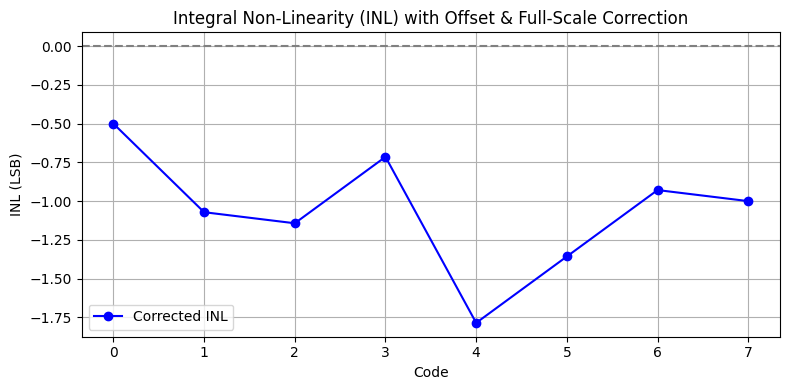

In [127]:
dnl = np.array([0, -0.5, 0, 0.5, -1, 0.5, 0.5, 0])

offset_error = 0.5      
full_scale_error = 0.5  
N = len(dnl) 

raw_inl = np.cumsum(dnl)

gain_correction = np.linspace(0, full_scale_error, N)

corrected_inl = raw_inl - offset_error - gain_correction

print("Code | DNL    | Raw INL | Gain Corr | Corrected INL")
for code in range(N):
    print(f"{code:4} | {dnl[code]:6} | {raw_inl[code]:7} | {gain_correction[code]:9.3f} | {corrected_inl[code]:13.3f}")

# Optional: Plot INL
plt.figure(figsize=(8, 4))
plt.plot(corrected_inl, marker='o', linestyle='-', color='blue', label='Corrected INL')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Integral Non-Linearity (INL) with Offset & Full-Scale Correction')
plt.xlabel('Code')
plt.ylabel('INL (LSB)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### 5b 

Part b: Plot the transfer curve of this ADC in Python.

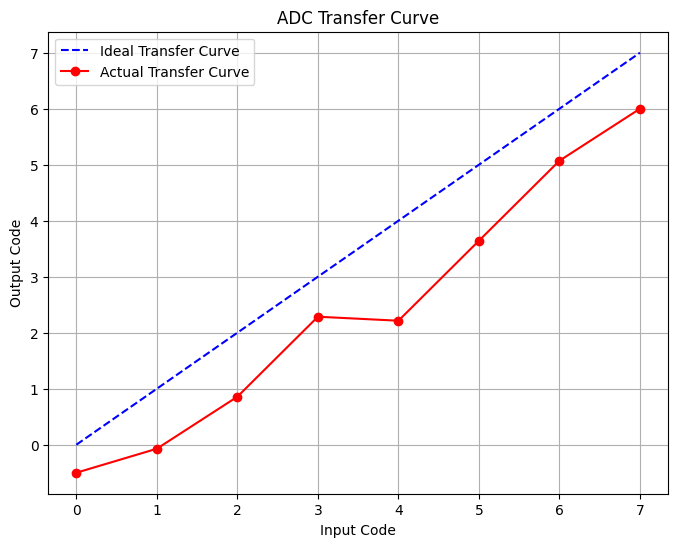

In [ ]:
codes = np.arange(len(dnl))  # ADC codes
ideal_transfer = codes  
actual_transfer = ideal_transfer + corrected_inl  

plt.figure(figsize=(8, 6))
plt.plot(codes, ideal_transfer, label="Ideal Transfer Curve", linestyle="--", color="blue")
plt.plot(codes, actual_transfer, label="Actual Transfer Curve", marker="o", color="red")
plt.title("ADC Transfer Curve")
plt.xlabel("Input Code")
plt.ylabel("Output Code")
plt.legend()
plt.grid()
plt.show()

--------------------

## Question 6

(Going off of an image in the lab manual)

### 6a 

Part a: Please explain the circuit dynamics for $\phi_2$ and $\phi_2$. Clearly indicate the region of operation of the transistors (i.e., OFF, triode, saturation)


In [128]:
#Explained in the lab report, not implemented in the code

### 6b 

Part b: Find an expression of the input vs the output that takes into account the gains and the positive regeneration of the circuit.


In [129]:
#Explained in the lab report, not implemented in the code

### 6c

Part c: Explain the advantages and disadvantages between dynamic and static latches?


In [130]:
#Explained in the lab report, not implemented in the code

### 6d

Part d: Is this latch a static, dynamic or a semi-dynamic latch? Why?

In [131]:
#Explained in the lab report, not implemented in the code

## AD2 Work

### Question 1

reference of 0.5v and full scale of a square wave with 1 v or 

1. build a comparator with an op amp
2. multiple resistors in series to make voltage references for the block diagram for the flash adc
3. generate the transfer function to verufy that it is designed correctly

    choose number of data points to use
    
    from 0 to vfs ub equal size steps 
    
    use the logic analyzer to translate those digital bits to the analog logic analyzer
    
    make this plot in python to find the offset, vfs error, and other analysis points

In [132]:
# for question 1 see the q1 and q1 ref files in the folder
# note that the frequency was too high for the op amp so I had to reduce to 1 kHz
# using a 100 ohm resistor to the ground and 470 to vdd

# for question 2


